2

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')



In [2]:
#DATA COLLECTION

In [3]:
#LOADING DATASET

In [8]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")

EDA

In [9]:
df.shape

(1599, 12)

In [6]:
#CHECKING SAMPLE

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


THERE ARE 1599 ROWS.THE 1 TO 11 COLUMNS ARE FEATURES AND 12TH COLUMN IS LABEL OR TARGET AS WE NEED TO FINALLY CHECK THE QUALITY OF A NEW WINE. SINCE THE QUALITY CAN BE CLASSIFIED INTO GOOD(IF >=7) OR BAD (ELSE) THIS IS A CLASSIFICATION DATA.

In [11]:
df.isnull().sum() # CHECKING FOR NAN

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df.dtypes #to check data type of each column

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

SINCE ALL DATA IS IN FLOAT N QUALITY IS INT THE DATA LOOKS FINE

In [10]:
#DATA ANALYSIS AND VISUALISATION

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


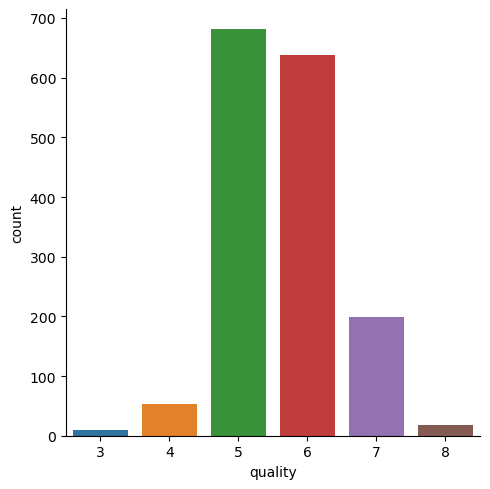

In [14]:
sns.catplot(x='quality',data=df,kind='count')

In [13]:
#no Qualtiy values for 1 n 2
#if quality is less than 7 it is bad
# samples for 5 n 6 is high

In [14]:
#COMPARING EACH FEATURE EFFECT ON TARGET

In [15]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [16]:
# we can see randomly analyse any column like volatile acidity is decreasing when the quality improves
# whereas citric acid incrreases with improve of quality

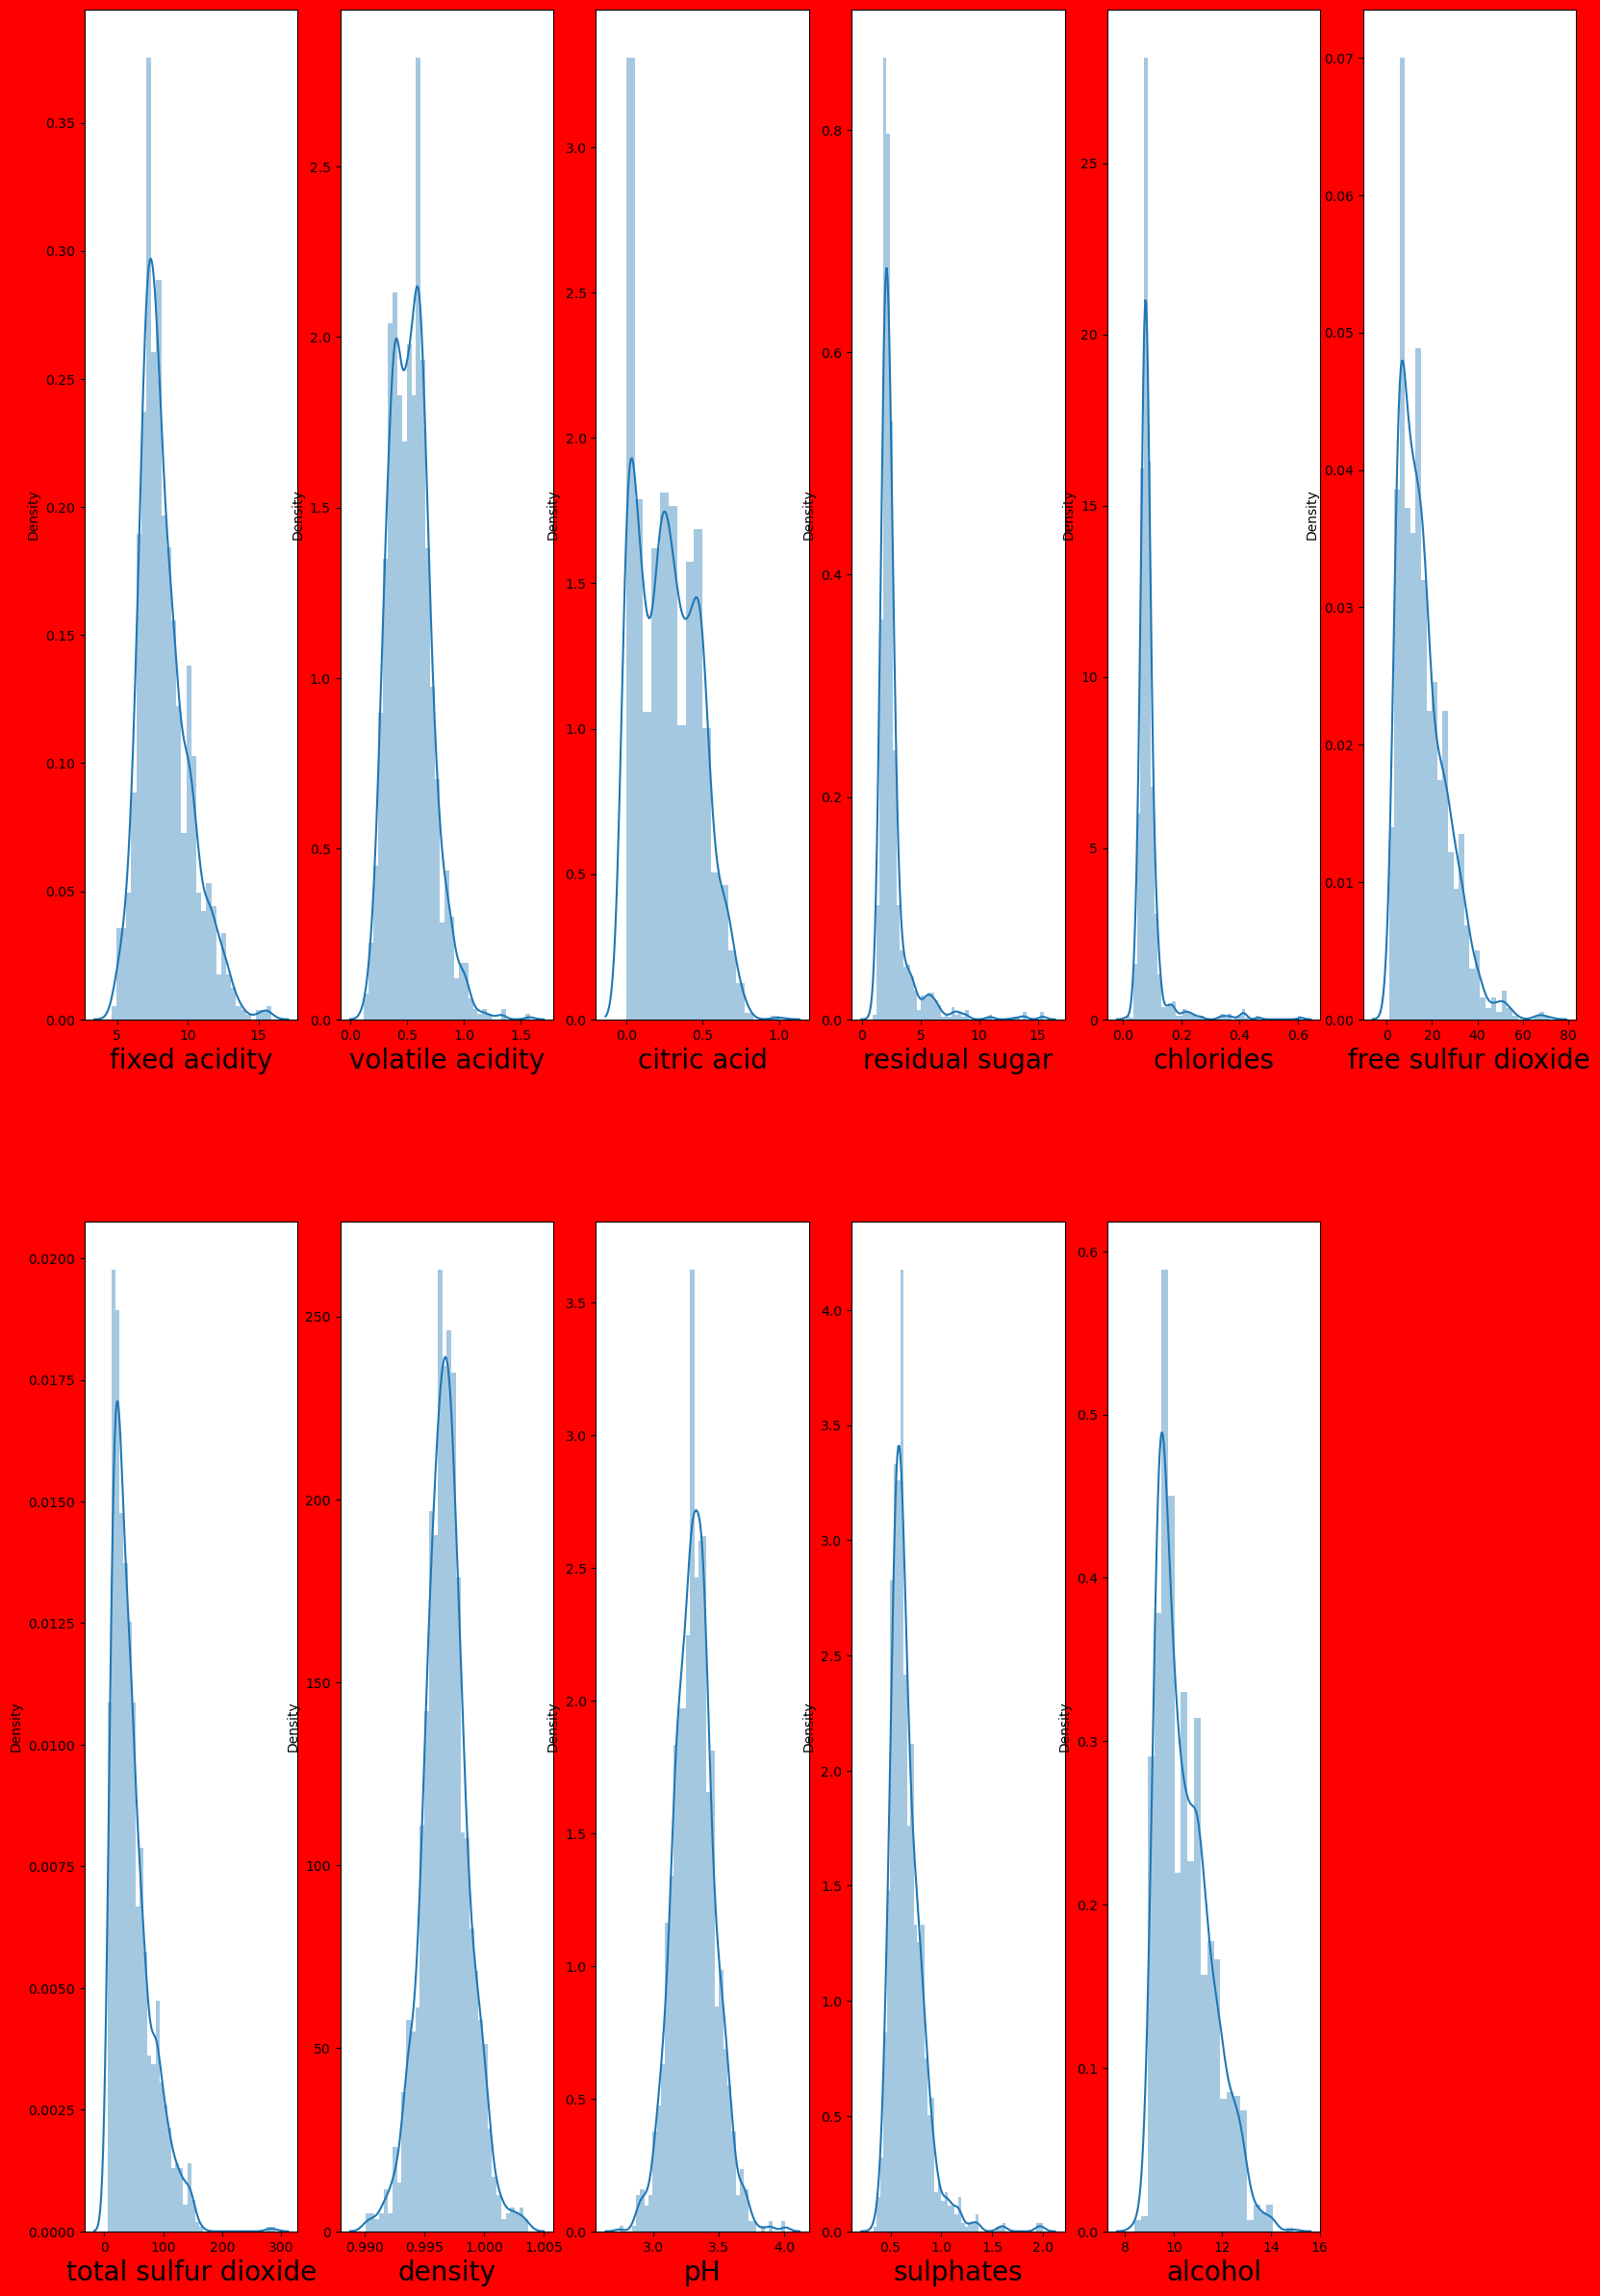

In [16]:
plot=plt.figure(figsize=(20,30), facecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax=plt.subplot(2,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
        
plt.show()        

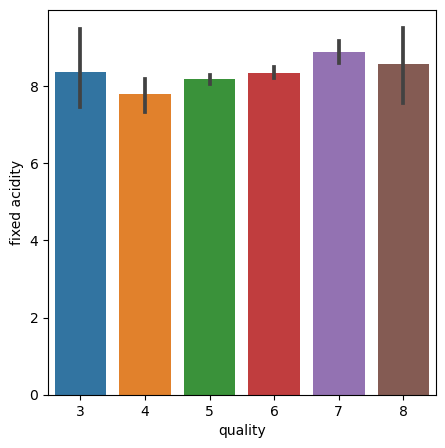

In [17]:
#WE CAN USE MORE GRAPH PLOTS
plot=plt.figure(figsize=(5,5))# to create graph
sns.barplot(x='quality',y='fixed acidity',data=df)
plt.show()

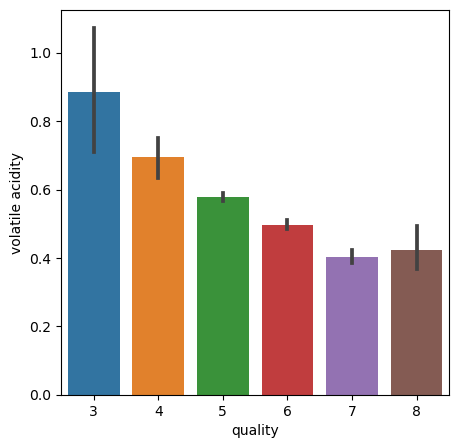

In [18]:
plot=plt.figure(figsize=(5,5))# to create graph
sns.barplot(x='quality',y='volatile acidity',data=df)
plt.show()

In [21]:
#we see that higher volatile aidity lower quality of wine. inverse related

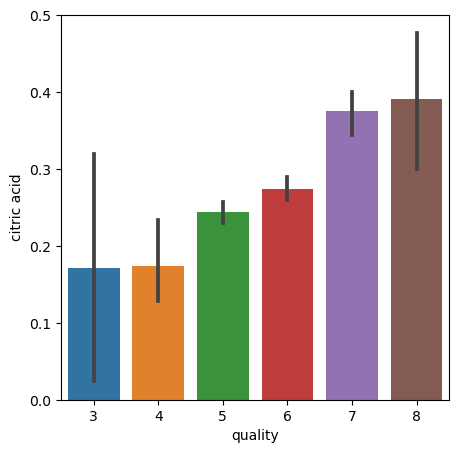

In [20]:
plot=plt.figure(figsize=(5,5))# to create graph
sns.barplot(x='quality',y='citric acid',data=df)
plt.show()

In [23]:
# high citric acid better qualtiy....direct relation

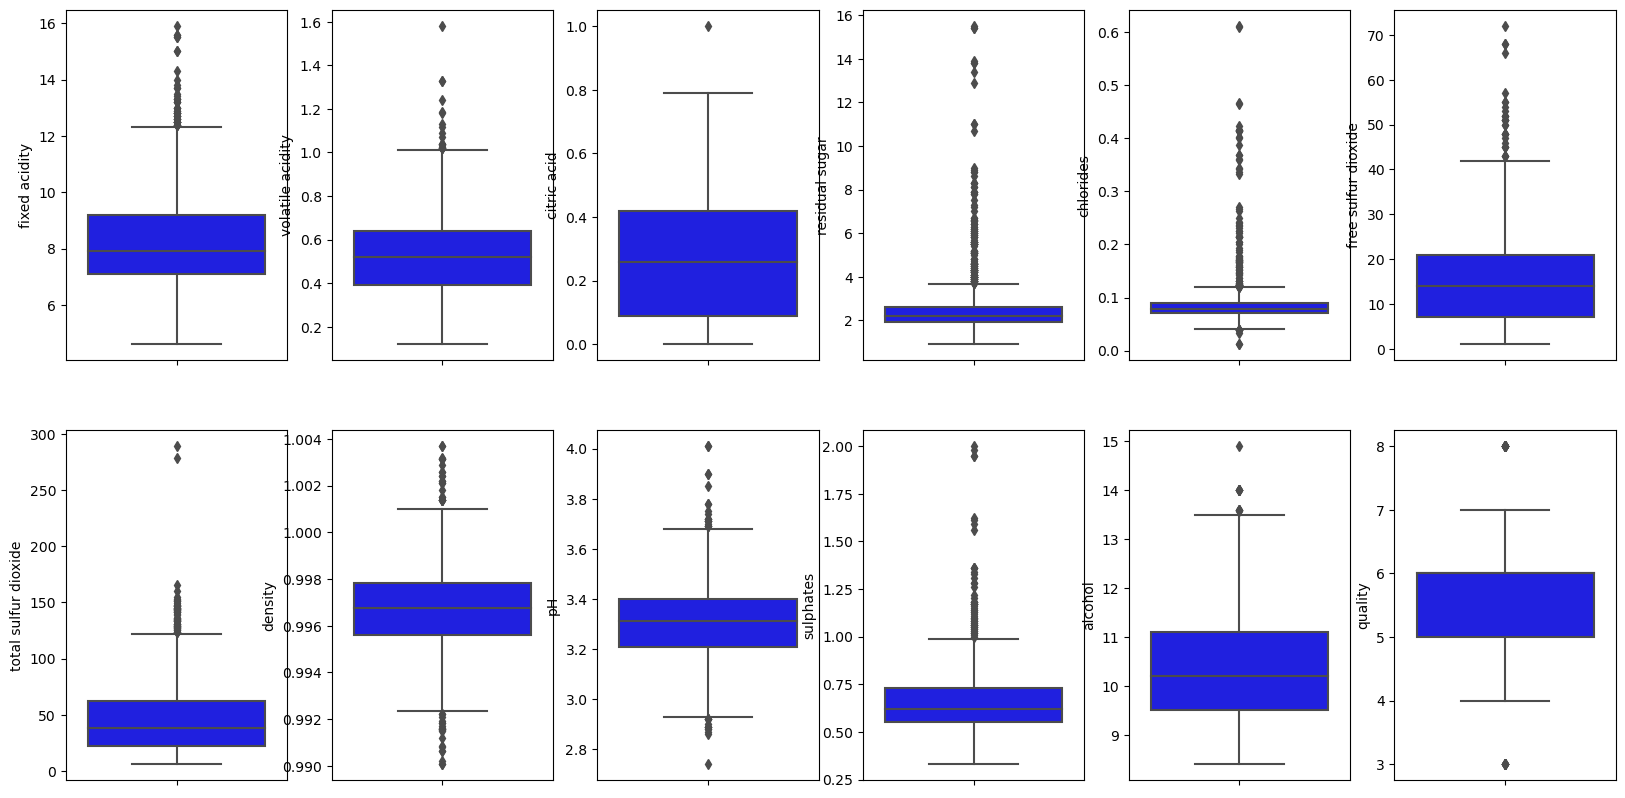

In [21]:
#lets see whether our data has outliers or not:

# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='b', ax=ax[index])
    index += 1
plt.show()

In [22]:
#Defining a function for removing outliers using IQR formulas

def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df=mod_outlier(df)

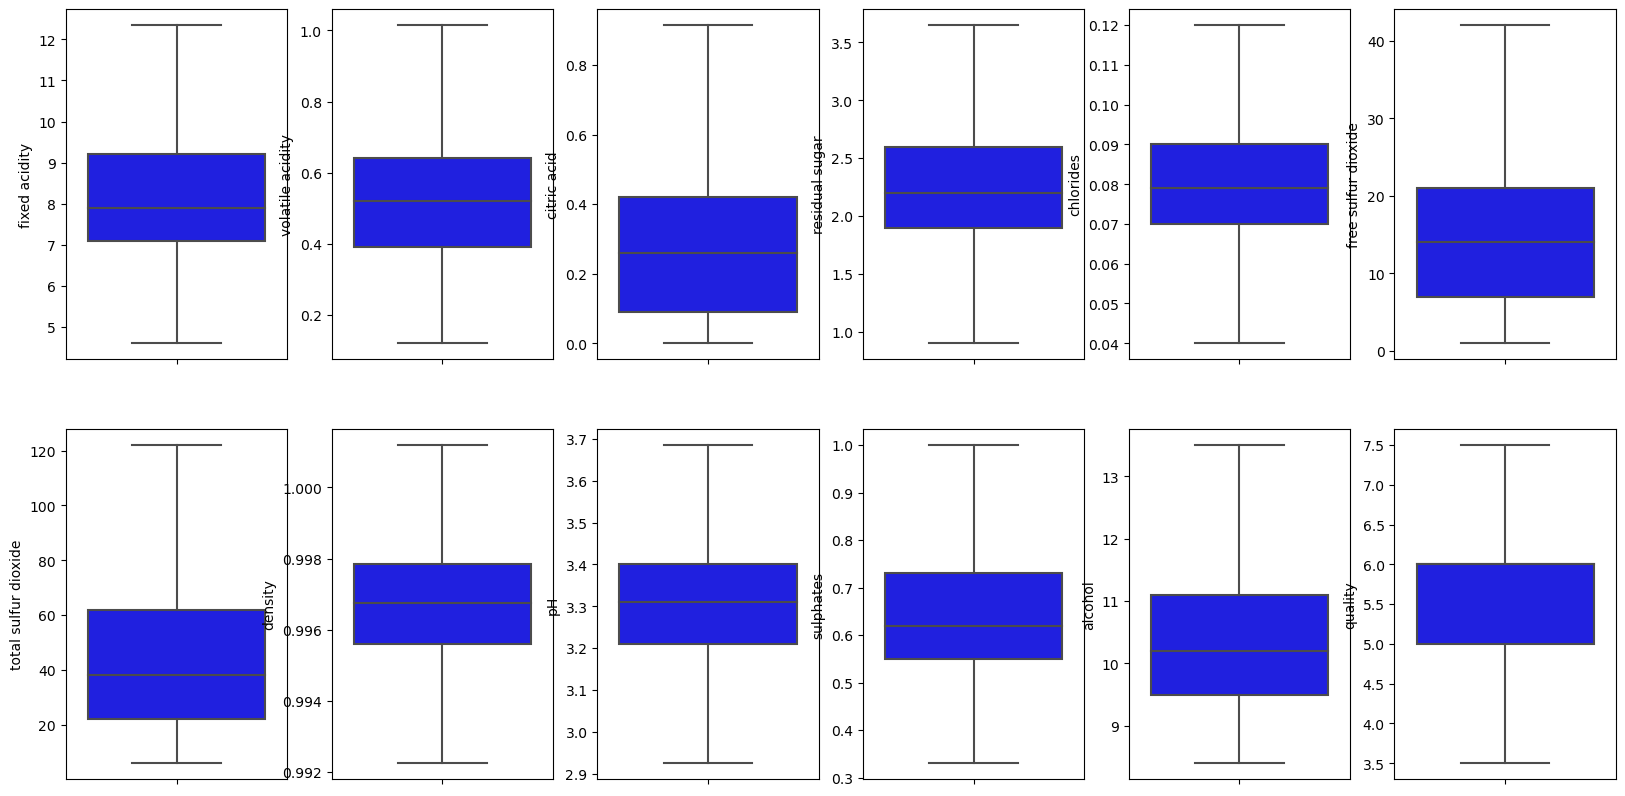

In [23]:

#To check whether outliers have been removed to get more accurate model
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='b', ax=ax[index])
    index += 1
plt.show()

FINDING CORRELATION OF ALL FEATURES

In [27]:
corr=df.corr()

MAKING A HEATMAP FOR UNDERSTANDING THE SAME

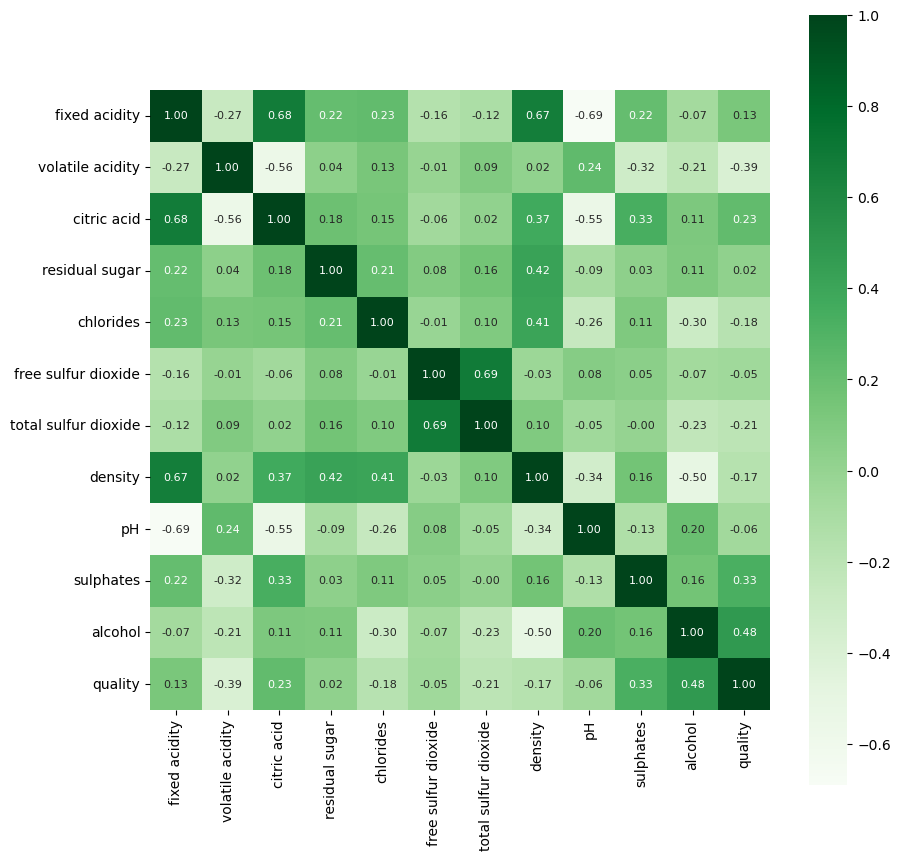

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt=".2f",annot=True,annot_kws={"size":8},cmap="Greens")
plt.show()

we can see the alcohol is positively correlated to quality as the cell is having 0.48 value whereas volatile acidity has negative correlation and has value -0.39. This proves further our non graphical understanding.
-Multicollinearity between free sulphur and total sulphar

In [29]:
#to remove this we will do the scatterplot and then if required drop the column

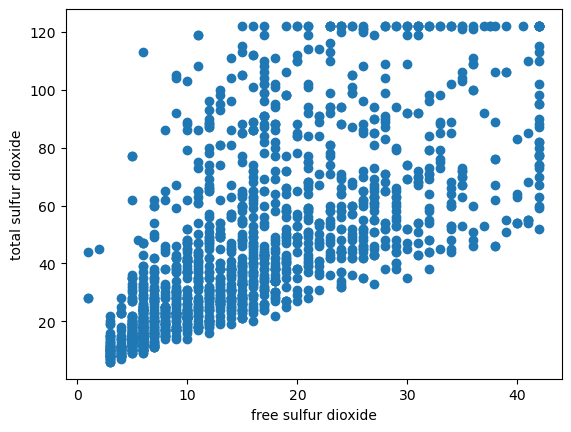

In [24]:
plt.scatter(df['free sulfur dioxide'],df['total sulfur dioxide'])
plt.xlabel('free sulfur dioxide')
plt.ylabel('total sulfur dioxide')
plt.show()

In [31]:
#This shows that both have them highly correlated as one increases other also increases the same
#Hence to build a accurate model we remove the col which contributes less to the label.
#from heatmap we see that free sulphur is contributing more than total suphur hence we will drop total sulphur

In [40]:
#Just to understand the impact of each feature we can use ExtraTreesClassifier

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
c=ExtraTreesClassifier()
c.fit(X,y)
s=c.feature_importances_
s

array([0.0846405 , 0.11023523, 0.09870552, 0.07741948, 0.08390332,
       0.07855595, 0.09329156, 0.07301905, 0.12091046, 0.17931894])

DATA PREPROCESSING

In [32]:
#we will split data

In [58]:
X=df.drop(columns=['quality','total sulfur dioxide'],axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2


In [34]:
#We will classify now label as the good or bad . hence will encode 0 and 1

In [35]:
#FINDING UNIQUE VALUES OF WINE QUALITY

In [26]:
uni=df['quality'].unique()
uni

array([5. , 6. , 7. , 4. , 7.5, 3.5])

In [27]:
y=df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
y[0:10]
# as per q we have been to told to infer the 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: quality, dtype: int64

In [39]:
#this binarisation has helped machine to learn it easy

In [61]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
x


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,-0.538197,0.997591,-1.392540,-0.693182,-0.291550,-0.476813,0.585705,1.332717,-0.655496,-0.966950
1,-0.296555,2.032132,-1.392540,0.455672,0.943237,0.946759,0.031853,-0.736650,0.220142,-0.587615
2,-0.296555,1.342438,-1.186940,-0.036694,0.606477,-0.070078,0.142624,-0.336128,0.001232,-0.587615
3,1.757401,-1.416339,1.485857,-0.693182,-0.347676,0.133289,0.696475,-1.003665,-0.509557,-0.587615
4,-0.538197,0.997591,-1.392540,-0.693182,-0.291550,-0.476813,0.585705,1.332717,-0.655496,-0.966950
...,...,...,...,...,...,...,...,...,...,...
1594,-1.263123,0.422846,-0.981340,-0.529060,0.494223,1.658544,-1.020464,0.932194,-0.509557,0.076221
1595,-1.444355,0.135473,-0.878541,-0.200816,-1.077323,2.370330,-0.898617,1.399470,0.803900,0.740057
1596,-1.202713,-0.094425,-0.724341,-0.036694,-0.291550,1.353493,-0.555229,0.731933,0.730930,0.550389
1597,-1.444355,0.681481,-0.775741,-0.529060,-0.347676,1.658544,-0.704769,1.733239,0.439051,-0.208280


In [53]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [54]:
#We see imbalance in target data

In [66]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(X,y)

In [68]:
y1.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

In [70]:
#DATA SPLITTING

In [73]:
X_train,X_test,y_train,y_test= train_test_split(x1,y1,test_size=0.3,random_state=7)

In [75]:
print(y1.shape,y_train.shape,y_test.shape)

(2764,) (1934,) (830,)


In [47]:
#distribution is correct

In [69]:
#TARGET BALANCED

MODEL BUILDING AND MODEL ACCURACY

LOGISTIC REGRESSION

In [76]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model_result=['LogisticRegression',accuracy_score(y_test,y_pred)]
model_result

['LogisticRegression', 0.844578313253012]

KNN

In [77]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model_result=['KNeighborsClassifier',accuracy_score(y_test,y_pred)]
model_result

['KNeighborsClassifier', 0.8903614457831325]

SVC

In [78]:
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model_result=['Support Vector',accuracy_score(y_test,y_pred)]
model_result

['Support Vector', 0.7891566265060241]

DECISION TREE

In [79]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model_result=['Decision Tree',accuracy_score(y_test,y_pred)]
model_result

['Decision Tree', 0.8975903614457831]

RANDOM FOREST CLASSIFIER

In [92]:
rfcmodel=RandomForestClassifier()
rfcmodel.fit(X_train,y_train)
y_pred=rfcmodel.predict(X_test)
rfcmodel_result=['RANDOM FOREST CLASSIFIER',accuracy_score(y_test,y_pred)]
rfcmodel_result

['RANDOM FOREST CLASSIFIER', 0.9228915662650602]

In [53]:
#here looking at result we can go ahead with RANDOM FOREST CLASSIFIER as it is having a good accuracy

In [99]:
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

In [93]:
score=cross_val_score(rfcmodel,x1,y1)
print(score)
print(score.mean())

[0.94394213 0.86799277 0.92766727 0.86437613 0.9076087 ]
0.9023173991666011


In [54]:
#HYPERPARAMTERTUNING

In [96]:
param={'criterion':['gini','entropy'],
            'random_state':[10,50,200],
            'max_depth':[0,10,20],
            'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]}


In [103]:
# we are initialising the randomised search sening our model for estimation . We have kept cross validation as 5 for faster processing
clf=RandomForestClassifier(n_estimators=50)
random_search = RandomizedSearchCV(clf, param_distributions=param,n_iter=20, cv=5) 

In [105]:
#We are fitting the data with hyperparameters as per the gridsearchCV
random_search.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=50),
                   n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 10, 20],
                                        'n_estimators': [50, 100, 200, 300],
                                        'n_jobs': [-2, -1, 1],
                                        'random_state': [10, 50, 200]})

In [106]:
#Once we have trained the data we get the best parameters
best_parameters=random_search.best_params_
print(best_parameters)

{'random_state': 50, 'n_jobs': -1, 'n_estimators': 100, 'max_depth': 20, 'criterion': 'entropy'}


In [108]:
model=RandomForestClassifier(random_state= 50, n_jobs= -1, n_estimators= 100, max_depth= 20, criterion= 'entropy')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model_result=['RandomForestClassifier',accuracy_score(y_test,y_pred)]
model_result

['RandomForestClassifier', 0.9265060240963855]

In [109]:
#There is a slight improvement in RFC

In [112]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [110]:
#Prediction of new data

In [118]:
data={'fixed acidity':7.3,'volatile acidity':0.65,'citric acid':0.00,'residual sugar':1.2,'chlorides':0.065,'free sulfur dioxide':15.0,'density':0.9946,'pH':3.39,'sulphates':0.47,'alcohol':0.47}
index=[0]
df1=pd.DataFrame(data,index)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.65,0.0,1.2,0.065,15.0,0.9946,3.39,0.47,0.47


In [121]:
pred_random=model.predict(df1)
pred_random

array([0], dtype=int64)

In [ ]:
#The result shows that based on the data imput given the quality of wine is poor quality

In [122]:
data={'fixed acidity':8.8,'volatile acidity':0.40,'citric acid':0.38,'residual sugar':2.72,'chlorides':0.075,'free sulfur dioxide':14.0,'density':0.9961,'pH':3.29,'sulphates':0.75,'alcohol':11.5}
index=[0]
df1=pd.DataFrame(data,index)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,8.8,0.4,0.38,2.72,0.075,14.0,0.9961,3.29,0.75,11.5


In [123]:
pred_random=model.predict(df1)
pred_random

array([1], dtype=int64)

In [124]:
# Note that we have increased alcohol content which makes qualtiy better...as proven with corr()

In [125]:
#The result shows that based on pur imputs the wine quality is good.

In [126]:
#THANK YOU